In [64]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [42]:
os.getcwd()
os.chdir('c:\\Users\\SAURAV\\Downloads\\assignment_data')

In [43]:
df=pd.read_csv('data.csv')

In [44]:
data=df.copy(deep=True)
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [45]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [46]:
print('The proportion of none-values in the data:\n\n',(df.isnull().sum()/len(df))*100)

The proportion of none-values in the data:

 Timestamp                     0.000000
Age                           0.000000
Gender                        0.000000
Country                       0.000000
state                        40.905481
self_employed                 1.429706
family_history                0.000000
treatment                     0.000000
work_interfere               20.969023
no_employees                  0.000000
remote_work                   0.000000
tech_company                  0.000000
benefits                      0.000000
care_options                  0.000000
wellness_program              0.000000
seek_help                     0.000000
anonymity                     0.000000
leave                         0.000000
mental_health_consequence     0.000000
phys_health_consequence       0.000000
coworkers                     0.000000
supervisor                    0.000000
mental_health_interview       0.000000
phys_health_interview         0.000000
mental_vs_physical 

In [47]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

# # Load your data
# df = pd.read_csv('mental_health_in_tech.csv')

# Drop timestamp
df = df.drop('Timestamp', axis=1)

# Optional: handle missing values
df['state'] = df['state'].fillna('Unknown')
df['self_employed'] = df['self_employed'].fillna('Unknown')
df['work_interfere'] = df['work_interfere'].fillna('Unknown')

# Define ordinal mappings
ordinal_mappings = {
    'work_interfere': ['Never', 'Rarely', 'Sometimes', 'Often', 'Unknown'],
    'no_employees': ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000'],
    'leave': ['Very difficult', 'Somewhat difficult', "Don't know", 'Somewhat easy', 'Very easy']
}

# Apply ordinal encoding
for col, categories in ordinal_mappings.items():
    oe = OrdinalEncoder(categories=[categories])
    df[col] = oe.fit_transform(df[[col]])

# Label encode target variable if needed (example: treatment column)
# le = LabelEncoder()
# df['treatment'] = le.fit_transform(df['treatment'])

# Identify categorical columns to one-hot encode
nominal_cols = [
    'Gender', 'Country', 'state', 'self_employed', 'family_history', 
    'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program',
    'seek_help', 'anonymity', 'mental_health_consequence', 'phys_health_consequence',
    'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
    'mental_vs_physical', 'obs_consequence'
]

# One-hot encode nominal columns
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

In [48]:
df.shape

(1259, 176)

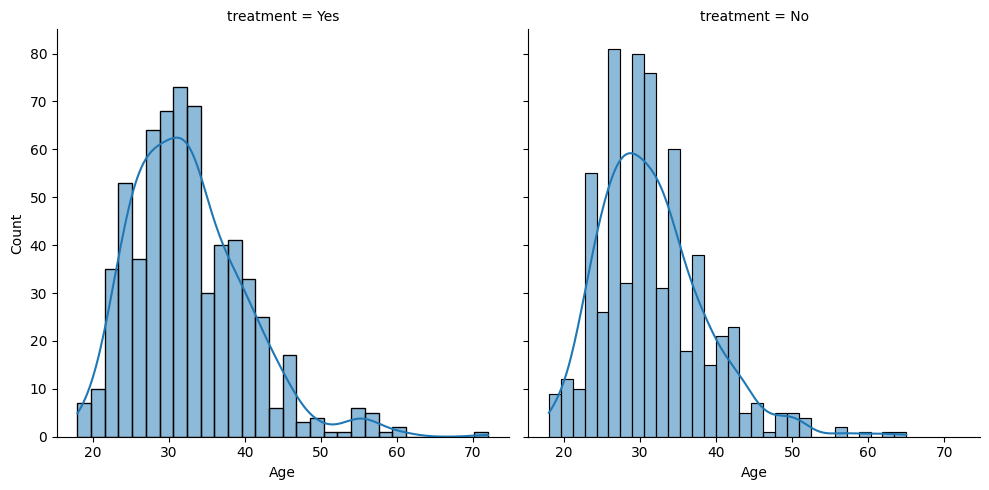

In [49]:
# Example: Keep only ages between 18 and 100
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]
g = sns.FacetGrid(df, col='treatment', height=5)
g.map(sns.histplot, "Age", bins=30, kde=True)

plt.show()

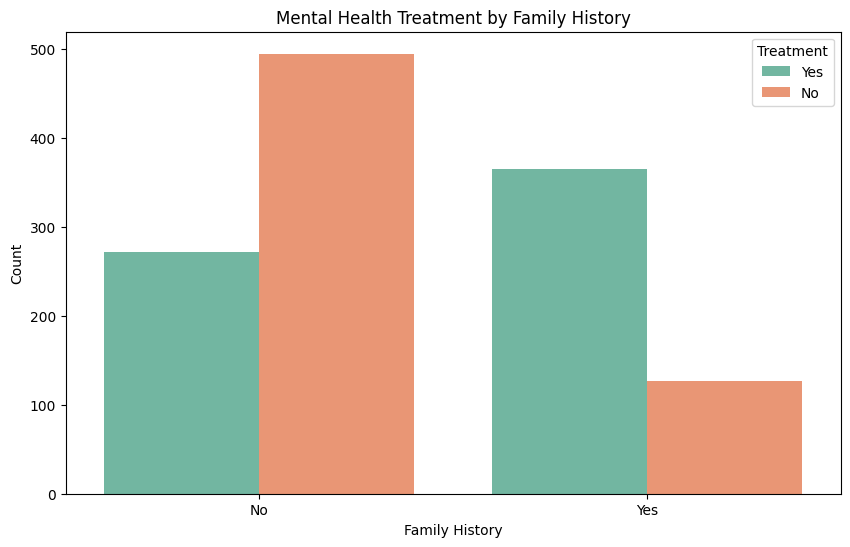

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(
    data=data,
    x='family_history',
    hue='treatment',
    palette='Set2'
)

plt.title('Mental Health Treatment by Family History')
plt.ylabel('Count')
plt.xlabel('Family History')
plt.legend(title='Treatment')
plt.show()


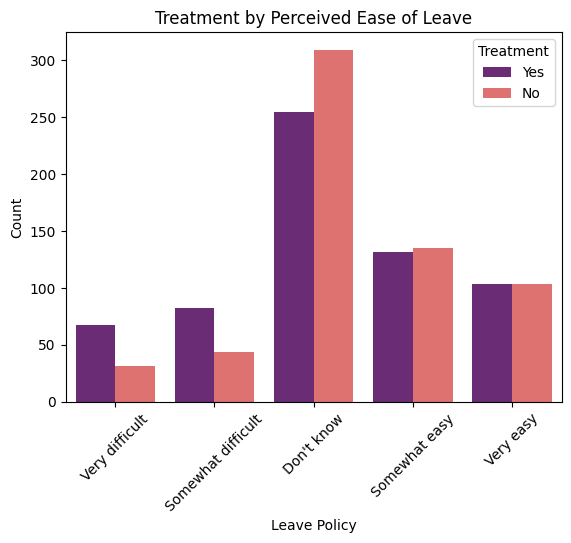

In [52]:
sns.countplot(
    data=data,
    x='leave',
    hue='treatment',
    order=[
        'Very difficult', 'Somewhat difficult', "Don't know",
        'Somewhat easy', 'Very easy'
    ],
    palette='magma'
)
plt.title('Treatment by Perceived Ease of Leave')
plt.ylabel('Count')
plt.xlabel('Leave Policy')
plt.xticks(rotation=45)
plt.legend(title='Treatment')
plt.show()


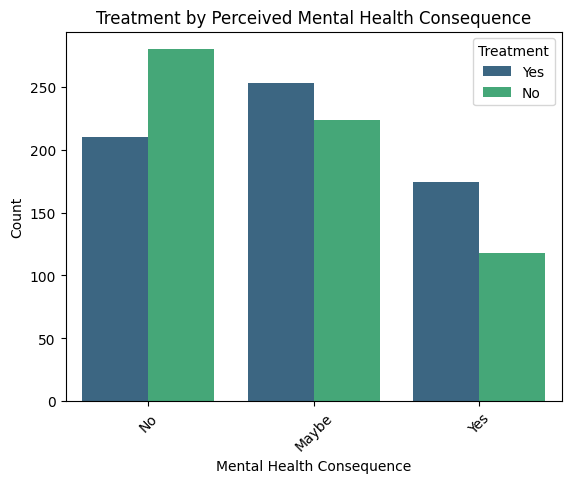

In [53]:
sns.countplot(
    data=data,
    x='mental_health_consequence',
    hue='treatment',
    palette='viridis'
)
plt.title('Treatment by Perceived Mental Health Consequence')
plt.ylabel('Count')
plt.xlabel('Mental Health Consequence')
plt.xticks(rotation=45)
plt.legend(title='Treatment')
plt.show()


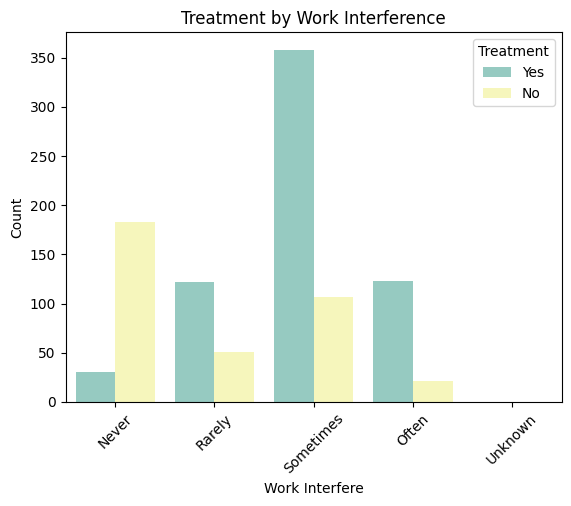

In [54]:
sns.countplot(
    data=data,
    x='work_interfere',
    hue='treatment',
    order=['Never', 'Rarely', 'Sometimes', 'Often', 'Unknown'],
    palette='Set3'
)
plt.title('Treatment by Work Interference')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Work Interfere')
plt.legend(title='Treatment')
plt.show()


C:\Users\SAURAV\AppData\Local\Temp\ipykernel_7992\2702828164.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.head(20), y=importances.head(20).index, palette='viridis')


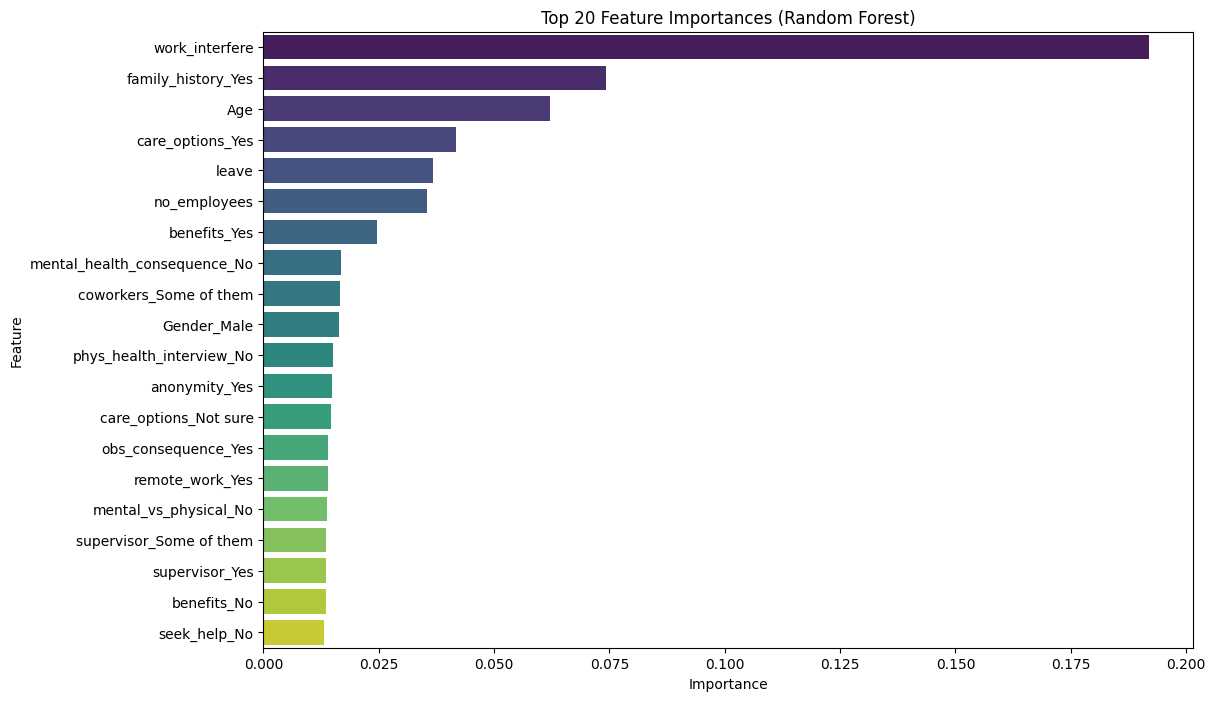

In [69]:
# Split

# Map target column
df['treatment'] = df['treatment'].map({'Yes': 1, 'No': 0})

X = df.drop(['comments','treatment'], axis=1)
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,8))
sns.barplot(x=importances.head(20), y=importances.head(20).index, palette='viridis')
plt.title('Top 20 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

top_features = importances.head(20).index.tolist()

# Prepare data with only top features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# ----------------------------------
# MODEL 1: Logistic Regression
# ----------------------------------
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_top, y_train)

y_pred_log = log_reg.predict(X_test_top)
y_pred_proba_log = log_reg.predict_proba(X_test_top)[:,1]

# Metrics
auc_log = roc_auc_score(y_test, y_pred_proba_log)
f1_log = f1_score(y_test, y_pred_log)

print(f"Logistic Regression - AUC: {auc_log:.4f}, F1-score: {f1_log:.4f}")

# ----------------------------------
# MODEL 2: XGBoost Classifier
# ----------------------------------
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train_top, y_train)

y_pred_xgb = xgb_clf.predict(X_test_top)
y_pred_proba_xgb = xgb_clf.predict_proba(X_test_top)[:,1]

# Metrics
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f"XGBoost Classifier - AUC: {auc_xgb:.4f}, F1-score: {f1_xgb:.4f}")

Logistic Regression - AUC: 0.7219, F1-score: 0.6745
XGBoost Classifier - AUC: 0.8484, F1-score: 0.8073


c:\Users\SAURAV\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:35:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## Possible Next Steps:

1. Do More EDA to identify deeper insights
2. Identifying what kind of null values to better treat them.
3. Use Something like IV for variable selection. Adding another vertical.
4. Use Nested-CV for cross-validation.
5. Use more models and select the best one.
6. Try using Hyperopt for hyperparameter Tuning.
7. Use Something like SHAP values for interpretations.